In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random

%matplotlib inline

#read dataframe
df = pd.read_csv('titanic data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Female survival rate:  74.20382165605095
Male survival rate:  18.890814558058924


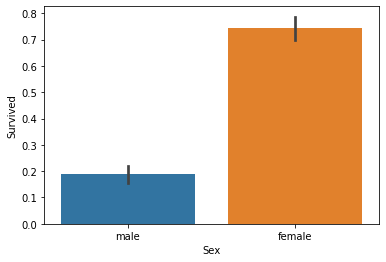

In [2]:
#Show relationship between sex and survival 
sns.barplot(x=df['Sex'], y=df['Survived'])
print('Female survival rate: ', df['Survived'][df['Sex']=='female'].value_counts(normalize='true')[1]*100)
print('Male survival rate: ', df['Survived'][df['Sex']=='male'].value_counts(normalize='true')[1]*100)


Percentage of Class 1 survived:  62.96296296296296
Percentage of Class 2 survived:  47.28260869565217
Percentage of Class 3 survived:  24.236252545824847


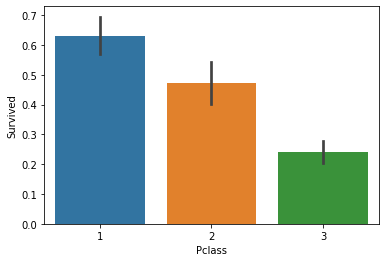

In [3]:
#Show relationship between Passenger Class and Survival
sns.barplot(x=df['Pclass'], y=df['Survived'])

print('Percentage of Class 1 survived: ', df['Survived'][df['Pclass']==1].value_counts(normalize='true')[1]*100)
print('Percentage of Class 2 survived: ', df['Survived'][df['Pclass']==2].value_counts(normalize='true')[1]*100)
print('Percentage of Class 3 survived: ', df['Survived'][df['Pclass']==3].value_counts(normalize='true')[1]*100)

Percentage of passenger with 0 siblings or spouses:  34.53947368421053
Percentage of passenger with 1 sibling or spouse:  53.588516746411486
Percentage of passenger with 2 siblings or spouses:  46.42857142857143
Percentage of passenger with 3 siblings or spouses:  25.0
Percentage of passenger with 4 siblings or spouses:  16.666666666666664


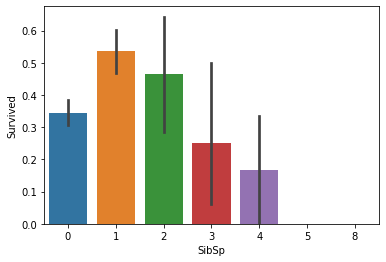

In [4]:
#Show relationship between sibling/spouses and survival
sns.barplot(x=df['SibSp'], y=df['Survived'])

print('Percentage of passenger with 0 siblings or spouses: ', df['Survived'][df['SibSp']==0].value_counts(normalize='true')[1]*100)
print('Percentage of passenger with 1 sibling or spouse: ', df['Survived'][df['SibSp']==1].value_counts(normalize='true')[1]*100)
print('Percentage of passenger with 2 siblings or spouses: ', df['Survived'][df['SibSp']==2].value_counts(normalize='true')[1]*100)
print('Percentage of passenger with 3 siblings or spouses: ', df['Survived'][df['SibSp']==3].value_counts(normalize='true')[1]*100)
print('Percentage of passenger with 4 siblings or spouses: ', df['Survived'][df['SibSp']==4].value_counts(normalize='true')[1]*100)

Percentage of Passengers with 0 parents or children who survived:  34.365781710914455
Percentage of Passengers with 1 parents or children who survived:  55.08474576271186
Percentage of Passengers with 2 parents or children who survived:  50.0
Percentage of Passengers with 3 parents or children who survived:  60.0
Percentage of Passengers with 5 parents or children who survived:  20.0


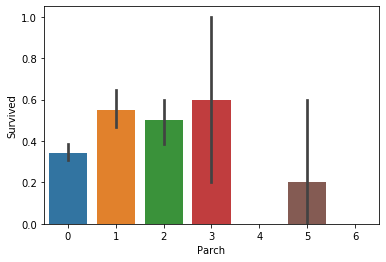

In [5]:
#Relationship between Parents and Children and Survival
sns.barplot(x=df['Parch'], y=df['Survived'])

print('Percentage of Passengers with 0 parents or children who survived: ', df['Survived'][df['Parch']==0].value_counts(normalize='true')[1]*100)
print('Percentage of Passengers with 1 parents or children who survived: ', df['Survived'][df['Parch']==1].value_counts(normalize='true')[1]*100)
print('Percentage of Passengers with 2 parents or children who survived: ', df['Survived'][df['Parch']==2].value_counts(normalize='true')[1]*100)
print('Percentage of Passengers with 3 parents or children who survived: ', df['Survived'][df['Parch']==3].value_counts(normalize='true')[1]*100)
#print('Percentage of Passengers with 4 parents or children who survived: ', df['Survived'][df['Parch']==4].value_counts(normalize='true')[1]*100)
print('Percentage of Passengers with 5 parents or children who survived: ', df['Survived'][df['Parch']==5].value_counts(normalize='true')[1]*100)



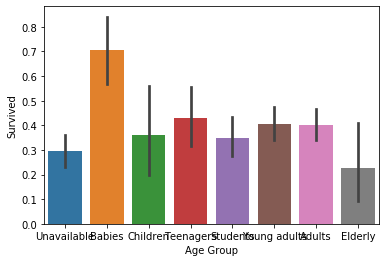

In [6]:
#Split up age into age groups
df['Age'] = df['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unavailable', 'Babies', 'Children', 'Teenagers', 'Students', 'Young adults', 'Adults', 'Elderly']

df['Age Group'] = pd.cut(x=df['Age'], bins=bins, labels=labels)

sns.barplot(x=df['Age Group'], y=df['Survived'])

Percentage of survival of higher socioeconomic class:  66.66666666666666
Percentage of survival of lower socioeconomic class:  29.985443959243085


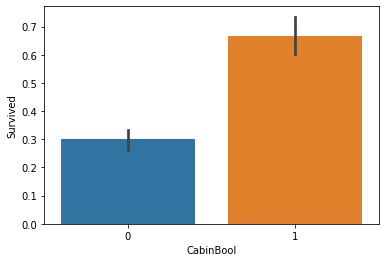

In [7]:
#For any datapoint that has a cabin, we can assume that they are of a higher socioeconomic class. We are testing its relationship with survival
df['CabinBool'] = df['Cabin'].notnull().astype('int')

sns.barplot(x=df['CabinBool'], y=df['Survived'])

print('Percentage of survival of higher socioeconomic class: ', df['Survived'][df['CabinBool']==1].value_counts(normalize='true')[1]*100)
print('Percentage of survival of lower socioeconomic class: ', df['Survived'][df['CabinBool']==0].value_counts(normalize='true')[1]*100)


In [8]:
#Converting -0.5 age values back to NaN
for i in range(len(df['Age'])):
    if (df['Age'][i]==-0.5):
        df['Age'][i]='NaN'

C:\Users\sampr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#Drop the ticket and cabin columns
df.drop('Ticket', axis=1)
df.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Students,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adults,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young adults,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young adults,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young adults,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Young adults,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Students,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Unavailable,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Young adults,1


In [10]:
#Checking what values of embarked are in majority
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#S is in majority, therefore, we can fill in the to NA values with S
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [12]:
#Converting sex to binary/numerical values
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [13]:
#Converting Embarked to numerical values
df['Embarked']=df['Embarked'].map({'S':1, 'C':2, 'Q':77})

In [14]:
#Filling age NaN values, and split into bands    12-32
df['Age'] = df['Age'].fillna(random.randint(12, 32))
df.head()

bins = [0, 5, 12, 18, 25, 40, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Young adult', 'Adult', 'Elderly']

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

df['Age'] = df['Age'].map({'Baby':1, 'Child':2, 'Teenager':3, 'Young adult':4, 'Adult':5, 'Elderly':6})

In [15]:
df.drop(labels=['Name', 'Age Group', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
#MODEL BUILDING
#Train, test split:
from sklearn.model_selection import train_test_split
X = df.drop(labels='Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


LogisticRegressionModel = LogisticRegression()

LogisticRegressionModel.fit(X_train, y_train)
LogisticRegressionPredictions = LogisticRegressionModel.predict(X_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, LogisticRegressionPredictions))
print('Classification Report: \n', classification_report(y_test, LogisticRegressionPredictions))
print('Accuracy Score: \n', round(accuracy_score(y_test, LogisticRegressionPredictions), 4)*100)
LogisticRegressionAccuracy = round(accuracy_score(y_test, LogisticRegressionPredictions), 4)*100

Confusion Matrix: 
 [[150  23]
 [ 29  66]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       173
           1       0.74      0.69      0.72        95

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268

Accuracy Score: 
 80.60000000000001


C:\Users\sampr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
#SVC model
from sklearn.svm import SVC

SvcModel = SVC()

SvcModel.fit(X_train, y_train)
SvcPredictions = SvcModel.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, SvcPredictions))
print('Classification report: \n', classification_report(y_test, SvcPredictions))
print('Accuracy score: \n', round(accuracy_score(y_test, SvcPredictions),4)*100)
SvcAccuracy = round(accuracy_score(y_test, SvcPredictions),4)*100

Confusion matrix: 
 [[169   4]
 [ 82  13]]
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.98      0.80       173
           1       0.76      0.14      0.23        95

    accuracy                           0.68       268
   macro avg       0.72      0.56      0.51       268
weighted avg       0.71      0.68      0.60       268

Accuracy score: 
 67.91


In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier()

DecisionTreeModel.fit(X_train, y_train)
DecisionTreePredictions = DecisionTreeModel.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, DecisionTreePredictions))
print('Classification report: \n', classification_report(y_test, DecisionTreePredictions))
print('Accuracy score: \n', round(accuracy_score(y_test, DecisionTreePredictions),4)*100)
DecisionTreeAccuracy = round(accuracy_score(y_test, DecisionTreePredictions),4)*100

Confusion matrix: 
 [[143  30]
 [ 31  64]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       173
           1       0.68      0.67      0.68        95

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

Accuracy score: 
 77.24


In [20]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier()

RandomForestModel.fit(X_train, y_train)
RandomForestPredictions = RandomForestModel.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, RandomForestPredictions))
print('Classification report: \n', classification_report(y_test, RandomForestPredictions))
print('Accuracy score: \n', round(accuracy_score(y_test, RandomForestPredictions),4)*100)
RandomForestAccuracy = round(accuracy_score(y_test, RandomForestPredictions),4)*100

Confusion matrix: 
 [[148  25]
 [ 24  71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       173
           1       0.74      0.75      0.74        95

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Accuracy score: 
 81.72


In [21]:
#K-Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier

KnnModel = KNeighborsClassifier()

KnnModel.fit(X_train, y_train)
KnnPredictions = KnnModel.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, KnnPredictions))
print('Classification report: \n', classification_report(y_test, KnnPredictions))
print('Accuracy score: \n', round(accuracy_score(y_test, KnnPredictions),4)*100)
KnnAccuracy = round(accuracy_score(y_test, KnnPredictions),4)*100

Confusion matrix: 
 [[130  43]
 [ 47  48]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       173
           1       0.53      0.51      0.52        95

    accuracy                           0.66       268
   macro avg       0.63      0.63      0.63       268
weighted avg       0.66      0.66      0.66       268

Accuracy score: 
 66.42


In [22]:
#Gradient Booster Classifier
from sklearn.ensemble import GradientBoostingClassifier

GradientBoosterModel = GradientBoostingClassifier()

GradientBoosterModel.fit(X_train, y_train)
GradientBoosterPredictions = GradientBoosterModel.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, GradientBoosterPredictions))
print('Classification report: \n', classification_report(y_test, GradientBoosterPredictions))
print('Accuracy score: \n', round(accuracy_score(y_test, GradientBoosterPredictions),4)*100)
GradientBoosterAccuracy = round(accuracy_score(y_test, GradientBoosterPredictions),4)*100

Confusion matrix: 
 [[152  21]
 [ 26  69]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       173
           1       0.77      0.73      0.75        95

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

Accuracy score: 
 82.46


In [23]:
FinalComparisionDf = pd.DataFrame({'Models' : ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'K-NN', 'Gradient Booster'], 
                                 'Accuracy' : [LogisticRegressionAccuracy, SvcAccuracy, DecisionTreeAccuracy, RandomForestAccuracy, KnnAccuracy, GradientBoosterAccuracy]})
FinalComparisionDf.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
5,Gradient Booster,82.46
3,Random Forest,81.72
0,Logistic Regression,80.60
2,Decision Tree,77.24
1,SVC,67.91
4,K-NN,66.42
